In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
tem = pd.read_csv("/content/drive/MyDrive/Summary of Weather.csv")

<ipython-input-2-ac284f1f90ba>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  tem = pd.read_csv("/content/drive/MyDrive/Summary of Weather.csv")


**Data Cleaning**

In [3]:
tem.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
tem = tem.drop(['WTE','RVG','RHN','RHX','SD3','TSHDSBRSGF','PGT','ITH','FTI','FB','FT','SND','SNF','MEA','MIN','MAX','SPD','DR','PRCP'], axis = 1)

In [5]:
tem.dropna(inplace = True)

In [6]:
tem.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA
63160,31302,1945-2-2,T,37.040,21.666667,9.444444,15.555556,0,1,45,2,2
63161,31302,1945-2-3,T,22.224,22.777778,7.777778,15.555556,0,1001,45,2,3
63162,31302,1945-2-4,0,20.372,25.000000,7.222222,16.111111,0,1,45,2,4
63163,31302,1945-2-5,0,27.780,25.000000,6.666667,16.111111,0,1,45,2,5
63165,31302,1945-2-7,0,29.632,22.777778,7.222222,15.000000,0,0,45,2,7


Data visualization

**Max temp in months**

In [7]:
df1 = pd.DataFrame(tem, columns = ['MO', 'MaxTemp'])
df1 = df1.set_index('MO')

In [8]:
df1.head()

,MaxTemp
MO,
2,21.666667
2,22.777778
2,25.000000
2,25.000000
2,22.777778


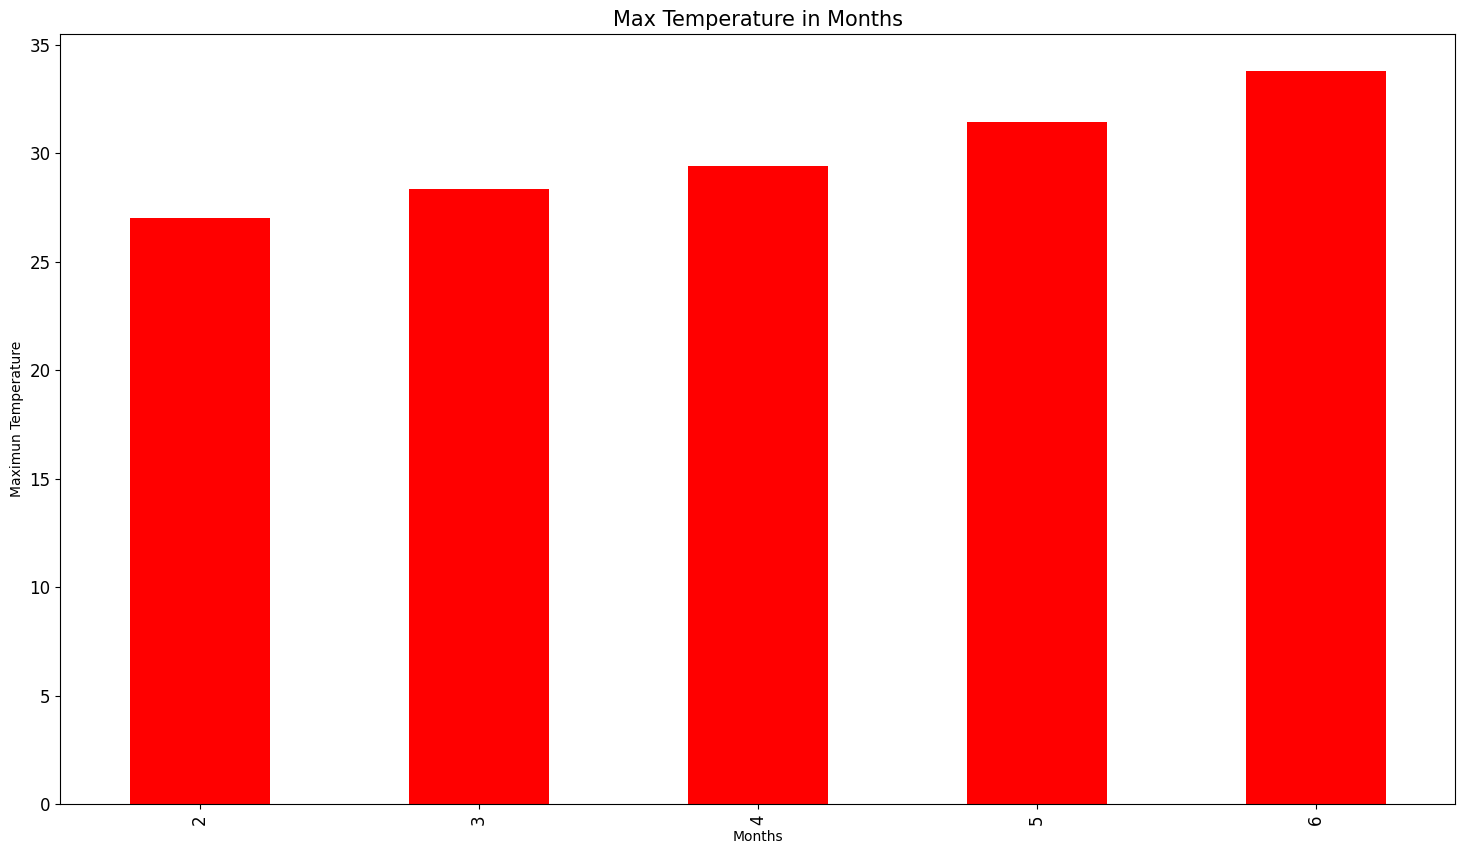

In [9]:
max = df1.groupby('MO')['MaxTemp'].mean()
max.plot(kind = 'bar' , color = 'red', figsize = (18, 10), fontsize = 12)
plt.title("Max Temperature in Months", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Maximun Temperature", fontsize = 10)
plt.show()

**Minimum Temperature in Months**

In [10]:
df2 = pd.DataFrame(tem, columns = ['MO', 'MinTemp'])
df2 = df2.set_index('MO')

In [11]:
df2.head()

,MinTemp
MO,
2,9.444444
2,7.777778
2,7.222222
2,6.666667
2,7.222222


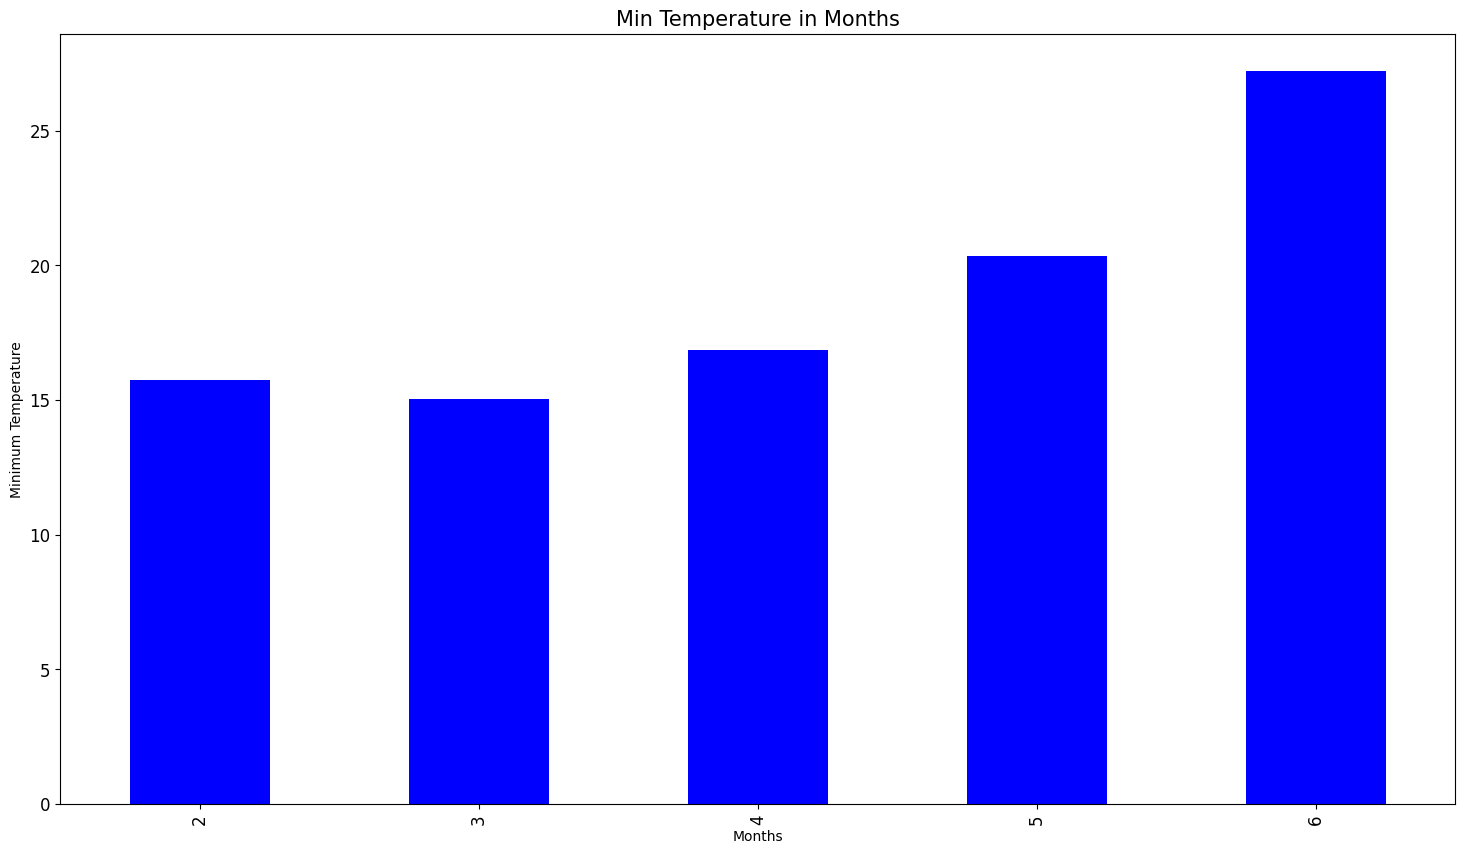

In [12]:
min = df2.groupby('MO')['MinTemp'].mean()
min.plot(kind = 'bar' , color = 'blue', figsize = (18, 10), fontsize = 12)
plt.title("Min Temperature in Months", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Minimum Temperature", fontsize = 10)
plt.show()

**Mean Temperature in months**

In [13]:
df3 = pd.DataFrame(tem, columns = ['MO', 'MeanTemp'])
df3 = df3.set_index('MO')

In [14]:
df3.head()

,MeanTemp
MO,
2,15.555556
2,15.555556
2,16.111111
2,16.111111
2,15.000000


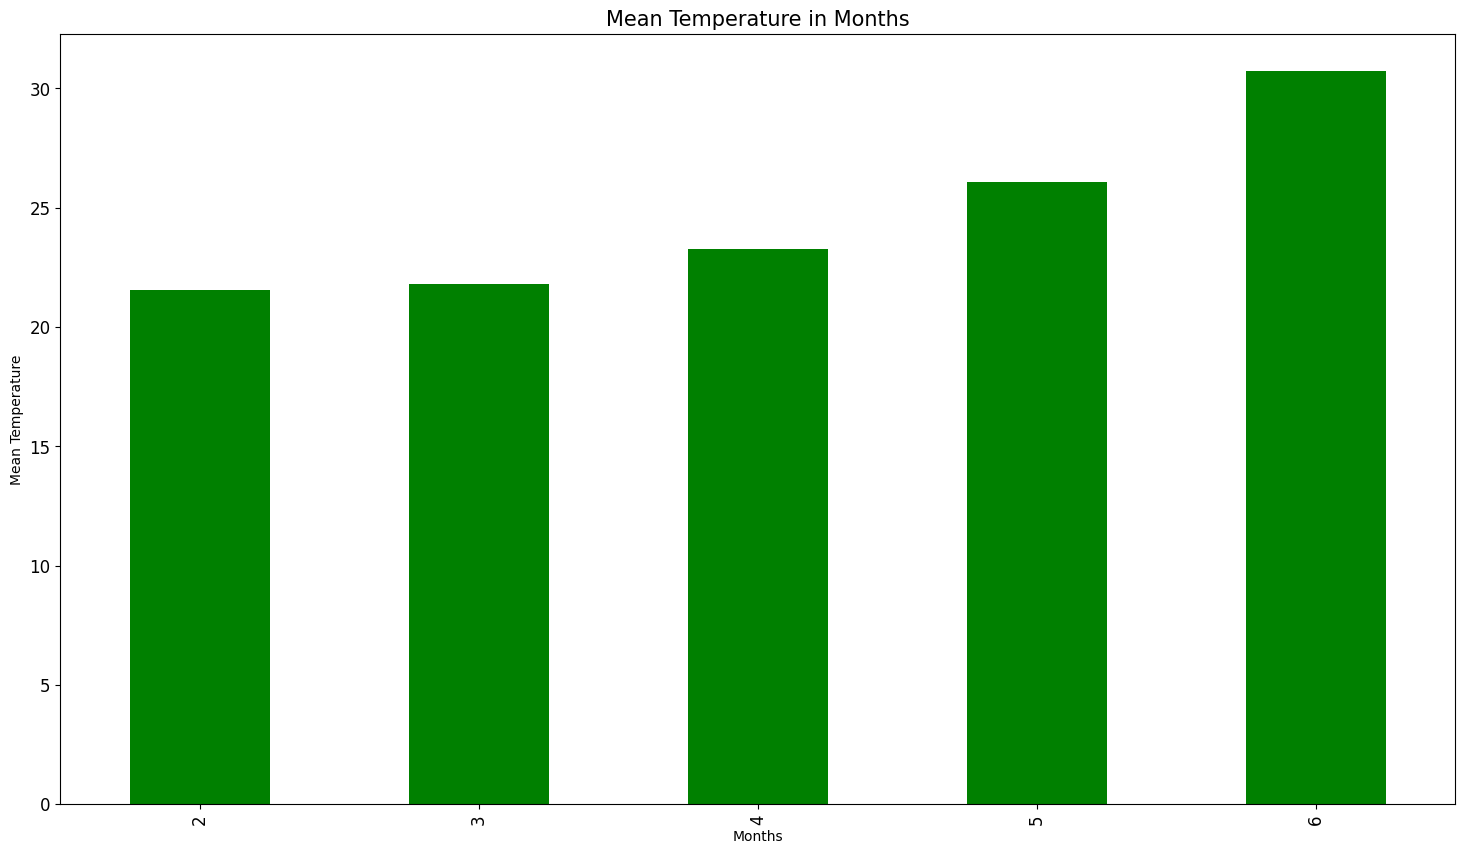

In [15]:
mean = df3.groupby('MO')['MeanTemp'].mean()
mean.plot(kind = 'bar' , color = 'green', figsize = (18, 10), fontsize = 12)
plt.title("Mean Temperature in Months", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Mean Temperature", fontsize = 10)
plt.show()

**Precipitation in months**

In [16]:
tem['Precip'] = tem['Precip'].replace('T', 0.0)
df4 = pd.DataFrame(tem, columns = ['MO', 'Precip']).set_index('MO')
df4['Precip'] = pd.to_numeric(df4['Precip'], errors='coerce')
df4.head()

,Precip
MO,
2,0.0
2,0.0
2,0.0
2,0.0
2,0.0


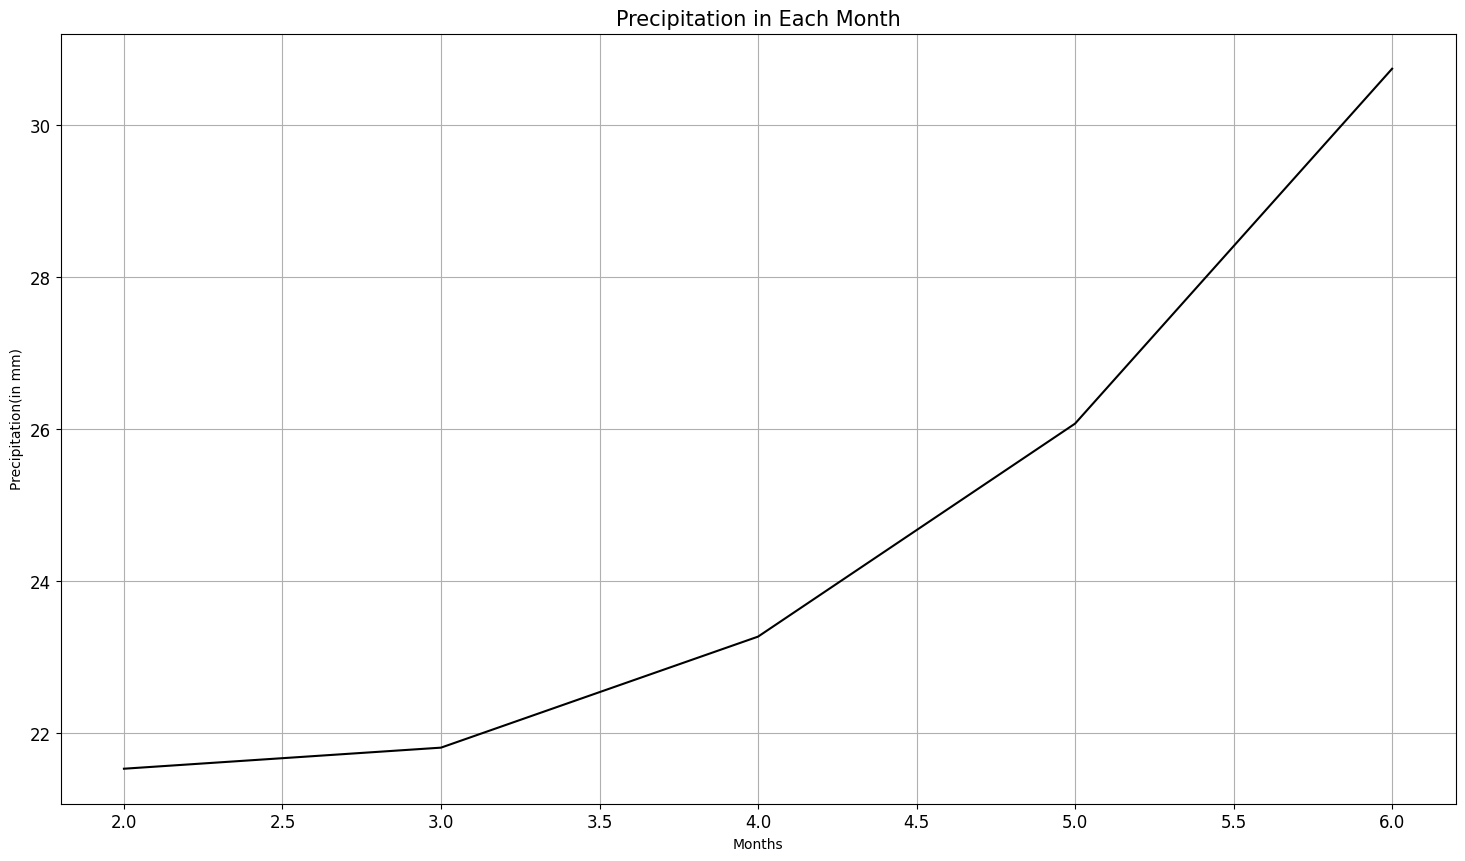

In [17]:
precip = df4.groupby('MO')['Precip'].mean()
mean.plot(kind = 'line' , color = 'black', figsize = (18, 10), fontsize = 12)
plt.title("Precipitation in Each Month", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Precipitation(in mm)", fontsize = 10)
plt.grid(True)
plt.show()

**WindGust Speed as per month**

In [18]:
df5 = pd.DataFrame(tem, columns = ['MO', 'WindGustSpd']).set_index('MO')
df5.head()

,WindGustSpd
MO,
2,37.040
2,22.224
2,20.372
2,27.780
2,29.632


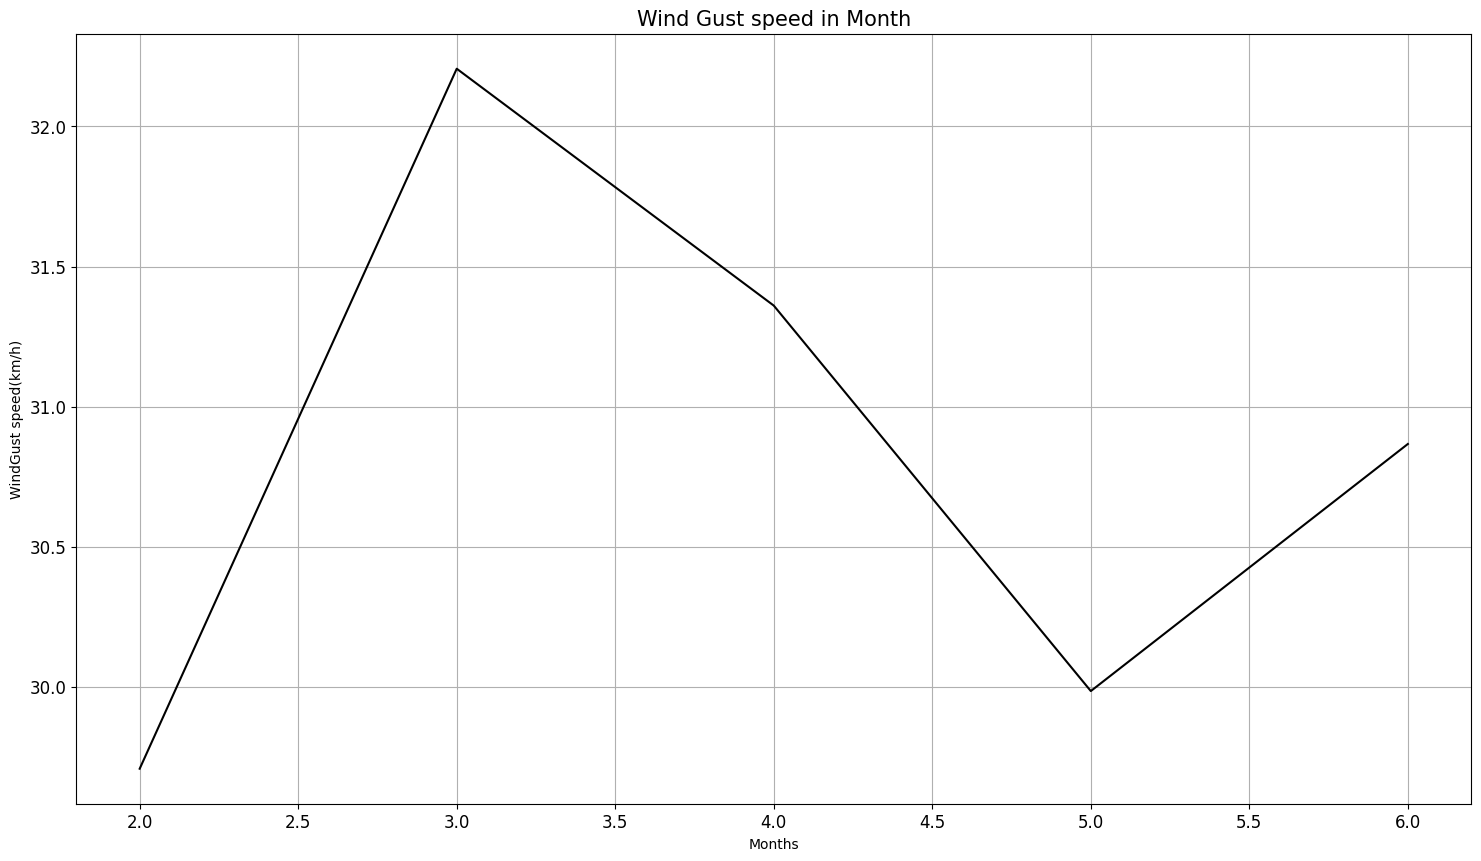

In [19]:
wind = df5.groupby('MO')['WindGustSpd'].mean()
wind.plot(kind = 'line' , color = 'black', figsize = (18, 10), fontsize = 12)
plt.title("Wind Gust speed in Month", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("WindGust speed(km/h)", fontsize = 10)
plt.grid(True)
plt.show()